In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
%cd /content/gdrive/My Drive/NMA/nma_easy_cabbage

/content/gdrive/My Drive/NMA/nma_easy_cabbage


In [4]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Plotting ISIs.ipynb
	jitter.html
	mini.sh
	processed_data/isi.pkl

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git add 'Plottin'

In [ ]:
!pip install --upgrade tables
!pip install datashader
!pip install holoviews

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_hdf('processed_data/session5_isi_prot4.h5', 'table')

In [5]:
df = df.explode(column='ISIs').reset_index()

In [ ]:
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.autompg import autompg
from bokeh.transform import jitter

import bokeh.io
bokeh.io.output_notebook()

years = sorted(autompg.yr.unique())


p2 = figure(plot_width=600, plot_height=300, title="Years vs mpg with jittering")
p2.xgrid.grid_line_color = None
p2.xaxis.ticker = years
p2.circle(x=jitter('yr', 0.4), y='mpg', size=9, alpha=0.4, source=autompg)
show(p2)



In [34]:
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.autompg import autompg
from bokeh.transform import jitter

import bokeh.io
bokeh.io.output_notebook()

In [85]:
import datashader as ds
import holoviews as hv

from holoviews import opts

from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.operation import decimate

hv.extension('bokeh')

Output hidden; open in https://colab.research.google.com to view.

In [98]:
# Convert brain areas to integers and extract ISIs
integer_ys, brain_areas_labels = df.brain_area.factorize()
# Add jitter
ys = np.array(integer_ys + np.random.randn(integer_ys.shape[0]) * 0.02)
isis = np.array(df.ISIs, dtype='float')
data = np.vstack([isis, ys]).T

In [103]:
points = hv.Points(data, label='Session 5')

In [109]:
hv.extension('bokeh')
datashade(points).opts(frame_width=600, frame_height=300)

Output hidden; open in https://colab.research.google.com to view.

In [115]:
df = pd.read_hdf('processed_data/session11_isi_prot4.h5', 'table')
df = df.explode(column='ISIs').reset_index()

# Convert brain areas to integers and extract ISIs
integer_ys, brain_areas_labels = df.brain_area.factorize()
# Add jitter
ys = np.array(integer_ys + np.random.randn(integer_ys.shape[0]) * 0.1)
isis = np.array(df.ISIs, dtype='float')
data = np.vstack([isis, ys]).T

points = hv.Points(data, label='Session 11')

In [116]:
hv.extension('bokeh')
datashade(points).opts(frame_width=600, frame_height=500)

Output hidden; open in https://colab.research.google.com to view.

In [127]:
df = pd.read_hdf('processed_data/session11_isi_prot4.h5', 'table')
df200 = df.loc[df['ISIs'] < 0.2]

ValueError: ignored

In [ ]:
df = pd.read_hdf('processed_data/session11_isi_prot4.h5', 'table')
df = df.explode(column='ISIs').reset_index().loc['ISIs' < 0.2]

# Convert brain areas to integers and extract ISIs
integer_ys, brain_areas_labels = df.brain_area.factorize()
# Add jitter
ys = np.array(integer_ys + np.random.randn(integer_ys.shape[0]) * 0.1)
isis = np.array(df.ISIs, dtype='float')
data = np.vstack([isis, ys]).T

points = hv.Points(data, label='Session 11 for ISI < 200 ms')

hv.extension('bokeh')
datashade(points).opts(frame_width=600, frame_height=500)

In [117]:
hv.NdOverlay({i: hv.Histogram(np.histogram(np.random.randn(100)+i*2)) for i in range(5)}).opts(
    'Histogram', width=600, alpha=0.8, muted_fill_alpha=0.1)

:NdOverlay   [Element]
   :Histogram   [x]   (Frequency)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc1eaa9c18>,
      dtype=object)

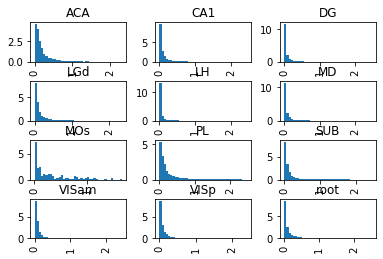

In [124]:
df['ISIs'].hist(by=df['brain_area'], bins=40, density=True)

In [125]:
def sephist(col):
    yes = df[df['group'] == 'yes'][col]
    no = df[df['group'] == 'no'][col]
    return yes, no

for num, alpha in enumerate('abcd'):
    plt.subplot(2, 2, num)
    plt.hist(sephist(alpha)[0], bins=25, alpha=0.5, label='yes', color='b')
    plt.hist(sephist(alpha)[1], bins=25, alpha=0.5, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

ModuleNotFoundError: ignored

AttributeError: ignored

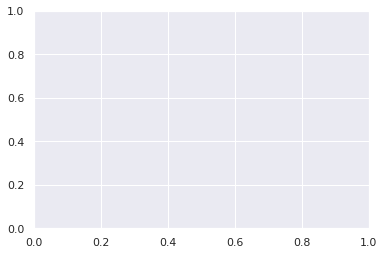

Error in callback <function flush_figures at 0x7fcc5338a840> (for post_execute):


KeyboardInterrupt: ignored

In [131]:
import seaborn
import matplotlib.pyplot as plt

seaborn.set()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

df['ISIs'].hist(by=df['brain_area'], bins=40, density=True, ax=ax, figsize=(5, 7))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:335: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


In [1]:
for brain_area in df['ISIs'].groupby('brain_area'):
  print(brain_area)

NameError: ignored